In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from IPython.display import display
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np

In [2]:
# Download historical stock data for a specific ticker
ticker = 'AAPL'
stock_data = yf.download(ticker, start='2020-01-01', end='2024-08-01')
stock_data = stock_data[['Open', 'Close', 'Adj Close']]
display(stock_data)

[*********************100%%**********************]  1 of 1 completed


,Open,Close,Adj Close
Date,,,
2020-01-02,74.059998,75.087502,72.876114
2020-01-03,74.287498,74.357498,72.167603
2020-01-06,73.447502,74.949997,72.742661
2020-01-07,74.959999,74.597504,72.400551
2020-01-08,74.290001,75.797501,73.565193
...,...,...,...
2024-07-25,218.929993,217.490005,217.238556
2024-07-26,218.699997,217.960007,217.708008
2024-07-29,216.960007,218.240005,217.987686


In [3]:
display(stock_data.describe())

,Open,Close,Adj Close
count,1152.000000,1152.000000,1152.000000
mean,146.959497,147.078464,145.328561
std,35.855954,35.840223,36.294339
min,57.020000,56.092499,54.569725
25%,126.947500,126.645002,124.464931
50%,149.095001,149.424995,147.370369
75%,173.022503,173.455002,172.191151
max,236.479996,234.820007,234.548523


In [4]:
stock_data_stat_df = pd.DataFrame({
    'Open': stock_data['Open'],
    'Close': stock_data['Close'],
    'Adj Close': stock_data['Adj Close'],
    
    'MEAN10D': stock_data['Open'].rolling(window=50).mean(),
    'MEAN30D': stock_data['Open'].rolling(window=50).mean(),
    'MEAN50D': stock_data['Open'].rolling(window=50).mean(),

    'STD10D': stock_data['Open'].rolling(window=10).std(),
    'STD30D': stock_data['Open'].rolling(window=30).std(),
    'STD50D': stock_data['Open'].rolling(window=50).std(),

    'MIN10D': stock_data['Open'].rolling(window=10).min(),
    'MIN30D': stock_data['Open'].rolling(window=30).min(),
    'MIN50D': stock_data['Open'].rolling(window=50).min(),

    'MAX10D': stock_data['Open'].rolling(window=10).max(),
    'MAX30D': stock_data['Open'].rolling(window=30).max(),
    'MAX50D': stock_data['Open'].rolling(window=50).max(),

    '25PERCENTILE10D': stock_data['Open'].rolling(window=10).apply(lambda x: np.percentile(x, 25)),
    '25PERCENTILE30D': stock_data['Open'].rolling(window=30).apply(lambda x: np.percentile(x, 25)),
    '25PERCENTILE50D': stock_data['Open'].rolling(window=50).apply(lambda x: np.percentile(x, 25)),

    '50PERCENTILE10D': stock_data['Open'].rolling(window=10).apply(lambda x: np.percentile(x, 50)),
    '50PERCENTILE30D': stock_data['Open'].rolling(window=30).apply(lambda x: np.percentile(x, 50)),
    '50PERCENTILE50D': stock_data['Open'].rolling(window=50).apply(lambda x: np.percentile(x, 50)),

    '75PERCENTILE10D': stock_data['Open'].rolling(window=10).apply(lambda x: np.percentile(x, 75)),
    '75PERCENTILE30D': stock_data['Open'].rolling(window=30).apply(lambda x: np.percentile(x, 75)),
    '75PERCENTILE50D': stock_data['Open'].rolling(window=50).apply(lambda x: np.percentile(x, 75)),
})

stock_data_stat_df = stock_data_stat_df.dropna()

display(stock_data_stat_df)

,Open,Close,Adj Close,MEAN10D,MEAN30D,MEAN50D,STD10D,STD30D,STD50D,MIN10D,...,MAX50D,25PERCENTILE10D,25PERCENTILE30D,25PERCENTILE50D,50PERCENTILE10D,50PERCENTILE30D,50PERCENTILE50D,75PERCENTILE10D,75PERCENTILE30D,75PERCENTILE50D
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-13,66.222504,69.492500,67.605957,76.147850,76.147850,76.147850,3.879043,5.635540,4.735365,63.985001,...,81.184998,66.988129,70.517500,74.072498,69.923752,75.996250,77.936253,73.052498,80.333750,79.913750
2020-03-16,60.487499,60.552502,58.908646,75.876400,75.876400,75.876400,4.886783,6.148994,5.221548,60.487499,...,81.184998,66.008751,70.331251,73.937498,69.316254,75.577503,77.936253,73.034998,80.275625,79.913750
2020-03-17,61.877499,63.215000,61.498882,75.628200,75.628200,75.628200,4.680602,6.554533,5.581178,60.487499,...,81.184998,64.473125,69.579378,73.555626,67.753754,74.776253,77.936253,70.211876,80.275625,79.913750
2020-03-18,59.942501,61.667500,59.993378,75.358100,75.358100,75.358100,4.622606,6.968797,5.999942,59.942501,...,81.184998,62.404374,69.300629,72.194374,66.080002,74.212502,77.936253,69.331879,80.275625,79.913750
2020-03-19,61.847500,61.195000,59.533710,75.095850,75.095850,75.095850,3.894622,7.126243,6.296914,59.942501,...,81.184998,61.855000,66.988129,70.835625,64.961250,73.994999,77.936253,68.519379,79.913750,79.913750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-25,218.929993,217.490005,217.238556,208.999398,208.999398,208.999398,5.286642,8.454011,15.731351,218.929993,...,236.479996,224.482498,213.870003,192.427502,227.964996,219.464996,211.794998,230.072498,227.719994,223.412498
2024-07-26,218.699997,217.960007,217.708008,209.623198,209.623198,209.623198,6.011318,8.092687,15.478191,218.699997,...,236.479996,224.092499,214.119995,193.087494,225.915001,219.464996,212.729996,230.072498,227.719994,223.412498
2024-07-29,216.960007,218.240005,217.987686,210.204198,210.204198,210.204198,5.718428,8.044658,15.189036,216.960007,...,236.479996,220.197495,214.119995,193.897495,224.595001,219.464996,213.610001,228.839996,227.719994,223.412498


In [9]:
# Select features and target variable
"""
features = stock_data_stat_df[['Open', 'MEAN10D', 'MEAN30D', 'MEAN50D', 'STD10D', 'STD30D', 'STD50D', 'MIN10D', 'MIN30D', 'MIN50D', 
                       'MAX10D', 'MAX30D', 'MAX50D', '25PERCENTILE10D', '25PERCENTILE30D', '25PERCENTILE50D', 
                       '50PERCENTILE10D', '50PERCENTILE30D', '50PERCENTILE50D', '75PERCENTILE10D', '75PERCENTILE30D', '75PERCENTILE50D']]
"""


features = stock_data_stat_df[['Open']]

target = stock_data_stat_df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.5, shuffle=False)

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
print(type(X_test))

y_pred = model.predict(X_test)

<class 'pandas.core.frame.DataFrame'>


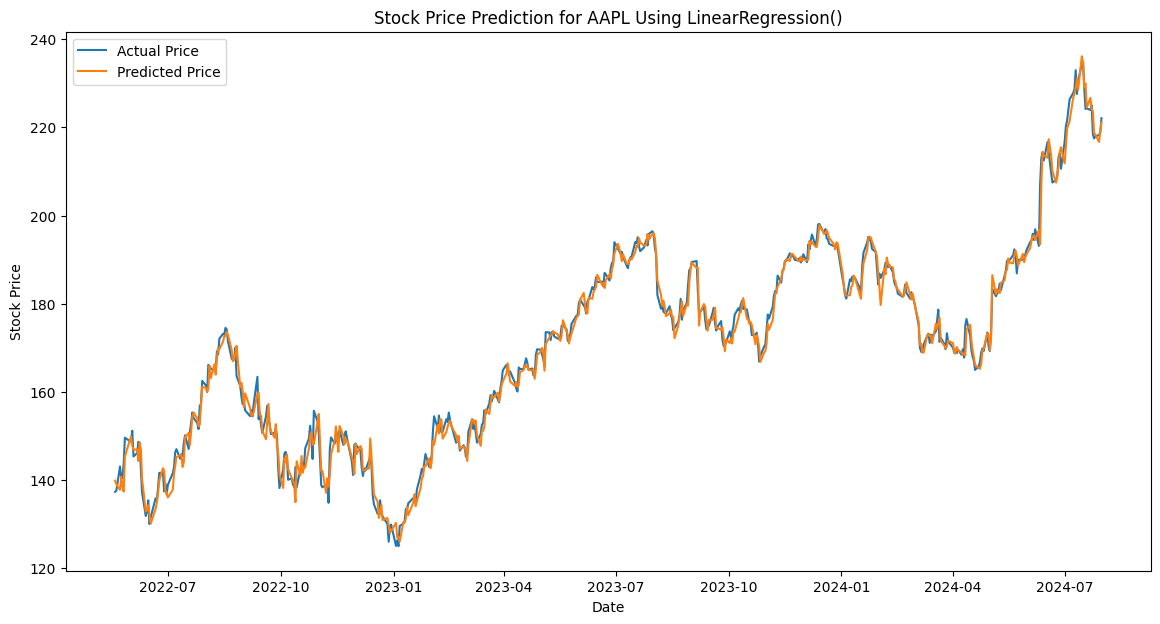

In [12]:
# Plot the predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Price')
plt.plot(y_test.index, y_pred, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'Stock Price Prediction for {ticker} Using {model}')
plt.legend()
plt.show()

In [104]:
def predict_forward(number_of_days, model, open_price_df):
    pred_data = {'Open': [open_price_df.iloc[0].tolist()[0]], 'Close': [None]}
    pred_dates = pd.date_range(open_price_df.index[-1], periods=1)
    pred_df = pd.DataFrame(pred_data, index=pred_dates)
    pred_df.index.name = 'Date'
    
    for i in range(number_of_days-1):
        last_row = pred_df[['Open']].iloc[-1]
        last_row_df = last_row.to_frame().T
    
        pred_close = model.predict(last_row_df)[0]

        this_date = pred_df.index[-1]
        pred_df.loc[this_date, 'Close'] = pred_close

        next_date = this_date + pd.Timedelta(days=1)
        pred_df.loc[next_date] = [pred_close, None]
    
    last_row = pred_df[['Open']].iloc[-1]
    last_row_df = last_row.to_frame().T
    pred_df.loc[next_date, 'Close'] = model.predict(last_row_df)[0]
    
    return pred_df

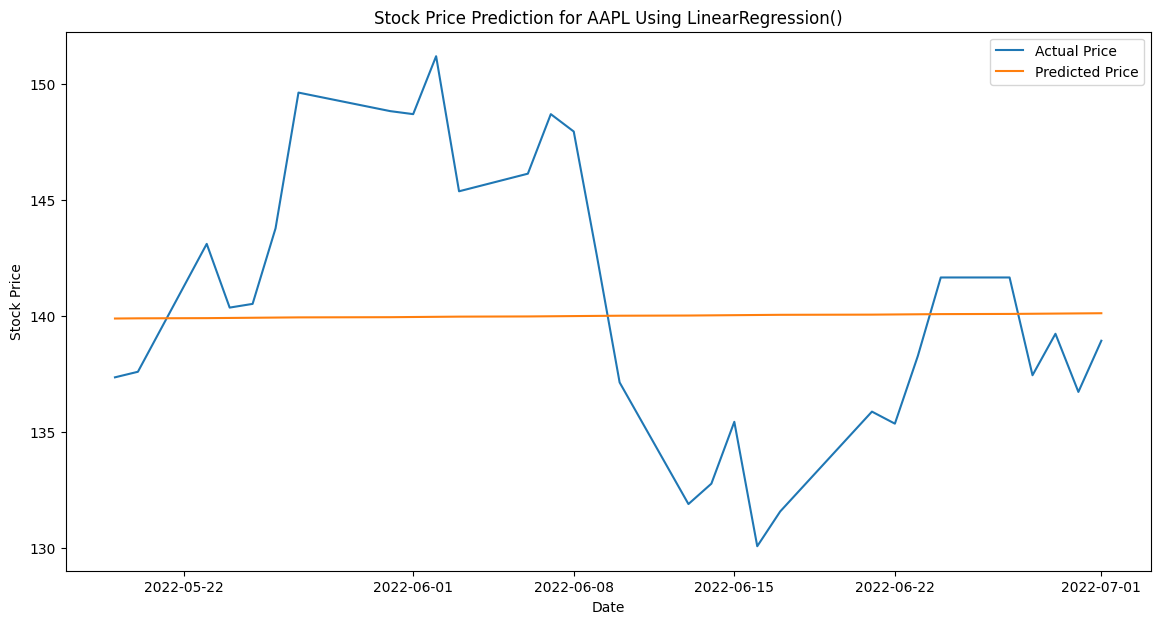

In [125]:
pred_df = predict_forward(
    number_of_days=30, 
    model=model, 
    open_price_df=X_test.iloc[[0]]
)

index = y_test.head(30).index
actual = y_test.head(30).values
pred = pred_df['Close'].values.astype(float)

# Plot the predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(index, actual, label='Actual Price')
plt.plot(index, pred, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'Stock Price Prediction for {ticker} Using {model}')
plt.legend()
plt.show()
